# 교통사고 심각도 예측 - EDA 분석

**📁 사용 파일 경로**
- 교통사고 데이터: `C:\2nd_miniproject\traffic_accidents.csv`
- 프로젝트 문서:
  - `교통사고 심각도 예측 모델.pdf`
  - `- 데이터에 대한 전처리 과정을 포함하세요..txt`

**🎯 목적**
- 사고가 발생했을 때 심각도(`most_severe_injury`)와 피해 규모(`injuries_total`)를 예측하기 위한 EDA 분석 수행
- 데이터의 분포, 변수 간 관계 및 인사이트 파악


In [1]:
# 라이브러리 불러오기
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.font_manager as fm

# 말굿체 설정
plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams['axes.unicode_minus'] = False  # 마이너스 깨짐 방지



In [2]:
# 데이터 불러오기
df = pd.read_csv(r'C:\2nd_miniproject\traffic_accidents.csv')

# 기본 정보 출력
print("데이터 크기:", df.shape)
print("컬럼 목록:", df.columns.tolist())
print("\n결측치 개수:\n", df.isnull().sum())
print("\n데이터 타입:\n", df.dtypes)


데이터 크기: (209306, 24)
컬럼 목록: ['crash_date', 'traffic_control_device', 'weather_condition', 'lighting_condition', 'first_crash_type', 'trafficway_type', 'alignment', 'roadway_surface_cond', 'road_defect', 'crash_type', 'intersection_related_i', 'damage', 'prim_contributory_cause', 'num_units', 'most_severe_injury', 'injuries_total', 'injuries_fatal', 'injuries_incapacitating', 'injuries_non_incapacitating', 'injuries_reported_not_evident', 'injuries_no_indication', 'crash_hour', 'crash_day_of_week', 'crash_month']

결측치 개수:
 crash_date                       0
traffic_control_device           0
weather_condition                0
lighting_condition               0
first_crash_type                 0
trafficway_type                  0
alignment                        0
roadway_surface_cond             0
road_defect                      0
crash_type                       0
intersection_related_i           0
damage                           0
prim_contributory_cause          0
num_units        

In [3]:
# 통계 요약
df.describe(include='all')



,crash_date,traffic_control_device,weather_condition,lighting_condition,first_crash_type,trafficway_type,alignment,roadway_surface_cond,road_defect,crash_type,...,most_severe_injury,injuries_total,injuries_fatal,injuries_incapacitating,injuries_non_incapacitating,injuries_reported_not_evident,injuries_no_indication,crash_hour,crash_day_of_week,crash_month
count,209306,209306,209306,209306,209306,209306,209306,209306,209306,209306,...,209306,209306.000000,209306.000000,209306.000000,209306.000000,209306.000000,209306.000000,209306.000000,209306.000000,209306.000000
unique,189087,19,12,6,18,20,6,7,7,2,...,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,12/29/2020 05:00:00 PM,TRAFFIC SIGNAL,CLEAR,DAYLIGHT,TURNING,NOT DIVIDED,STRAIGHT AND LEVEL,DRY,NO DEFECTS,NO INJURY / DRIVE AWAY,...,NO INDICATION OF INJURY,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,10,123944,164700,134109,64157,77753,204590,155905,171730,117376,...,154789,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,0.382717,0.001859,0.038102,0.221241,0.121516,2.244002,13.373047,4.144024,6.771822
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,0.799720,0.047502,0.233964,0.614960,0.450865,1.241175,5.603830,1.966864,3.427593
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,9.000000,2.000000,4.000000
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,14.000000,4.000000,7.000000
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,1.000000,0.000000,0.000000,0.000000,0.000000,3.000000,17.000000,6.000000,10.000000


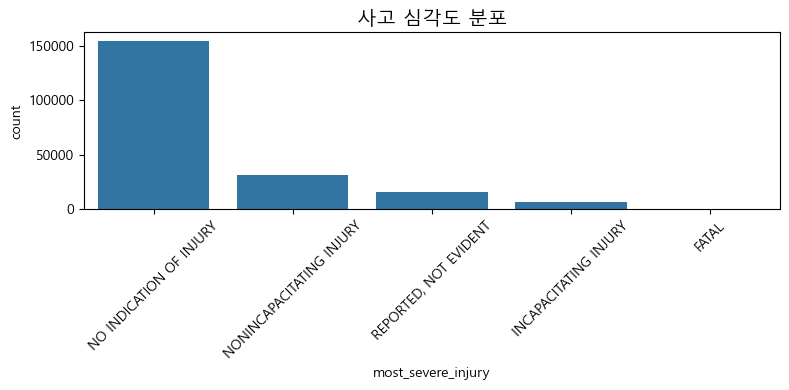

In [10]:
plt.figure(figsize=(8, 4))
sns.countplot(
    data=df,
    x='most_severe_injury',
    order=df['most_severe_injury'].value_counts().index
)
plt.title('사고 심각도 분포', fontsize=14)
plt.xticks(rotation=45, fontsize=10)  # 글자 기울이기
plt.tight_layout()
plt.show()


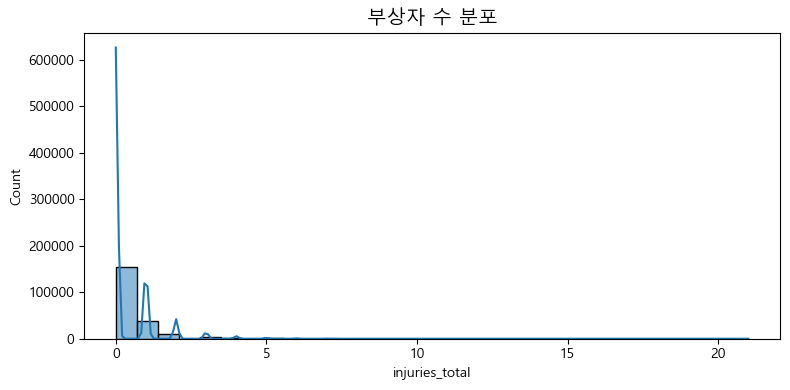

In [5]:
# 부상자 수 분포
plt.figure(figsize=(8, 4))
sns.histplot(data=df, x='injuries_total', bins=30, kde=True)
plt.title('부상자 수 분포', fontsize=14)
plt.xticks(fontsize=10)
plt.tight_layout()
plt.show()


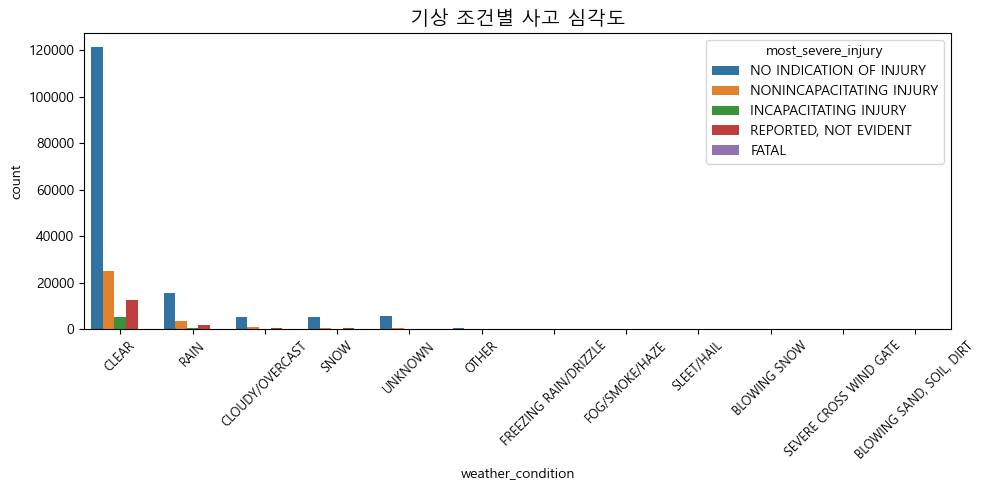

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 5))
sns.countplot(
    data=df,
    x='weather_condition',
    hue='most_severe_injury',
    order=df['weather_condition'].value_counts().index
)
plt.title('기상 조건별 사고 심각도', fontsize=14)
plt.xticks(rotation=45, fontsize=9)  # 글자를 45도 기울이고 크기를 줄임
plt.tight_layout()
plt.show()


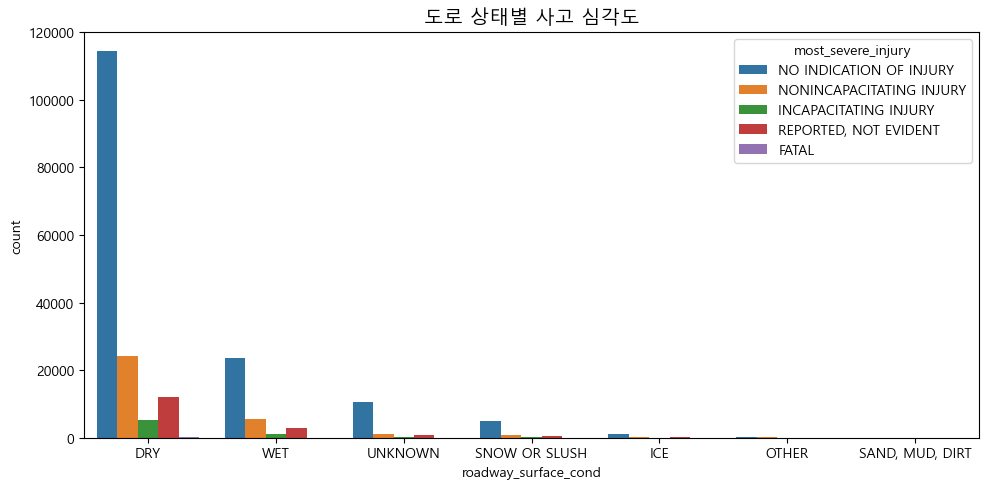

In [7]:
# 도로 상태 vs 사고 심각도
plt.figure(figsize=(10, 5))
sns.countplot(data=df, x='roadway_surface_cond', hue='most_severe_injury',
              order=df['roadway_surface_cond'].value_counts().index)
plt.title('도로 상태별 사고 심각도', fontsize=14)
plt.xticks(rotation=0, fontsize=10)
plt.tight_layout()
plt.show()


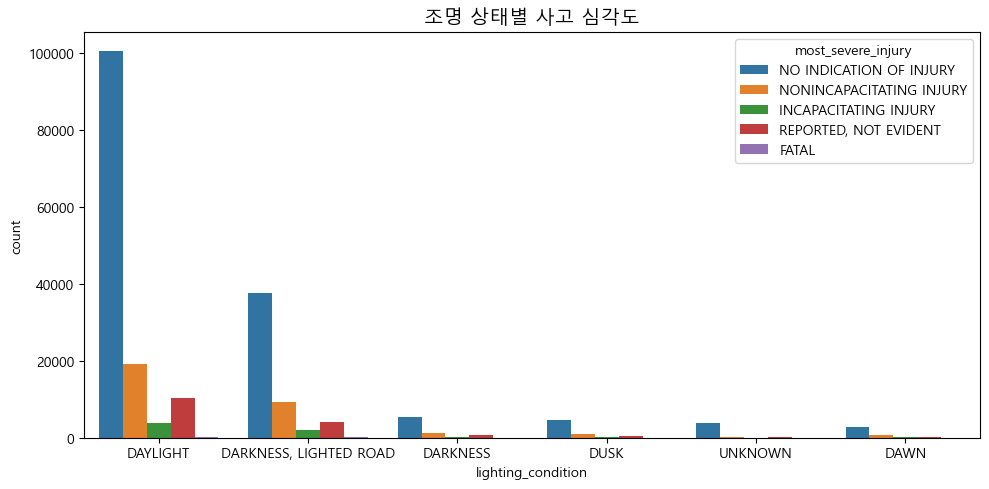

In [8]:
# 조명 상태 vs 사고 심각도
plt.figure(figsize=(10, 5))
sns.countplot(data=df, x='lighting_condition', hue='most_severe_injury',
              order=df['lighting_condition'].value_counts().index)
plt.title('조명 상태별 사고 심각도', fontsize=14)
plt.xticks(rotation=0, fontsize=10)
plt.tight_layout()
plt.show()

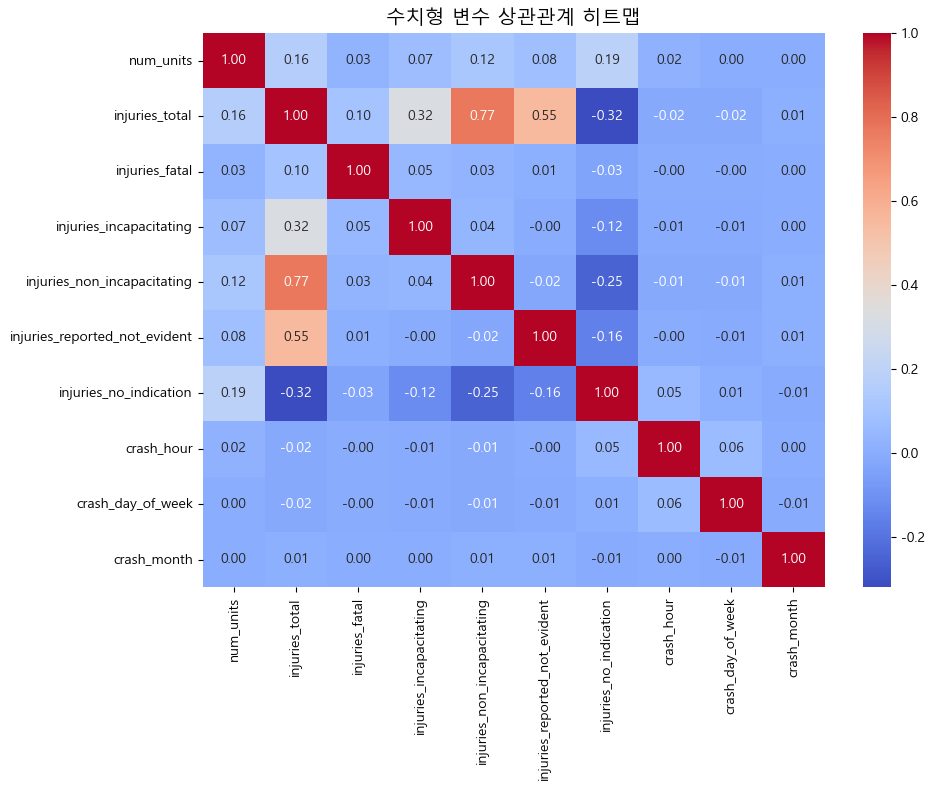

In [ ]:
# 수치형 변수 상관관계 히트맵
numeric_df = df.select_dtypes(include=['int64', 'float64'])

plt.figure(figsize=(10, 8))
sns.heatmap(numeric_df.corr(), annot=True, fmt=".2f", cmap='coolwarm')
plt.title('수치형 변수 상관관계 히트맵', fontsize=14)
plt.tight_layout()
plt.show()

# num_units: 사고에 관련된 차량 수 (정수형)

# injuries_total: 전체 부상자 수 (실수형)

# injuries_fatal: 사망자 수 (실수형)

# injuries_incapacitating: 중상자 수 (실수형)

# injuries_non_incapacitating: 경상자 수 (실수형)

# injuries_reported_not_evident: 외상이 없는 신고된 부상자 수 (실수형)

# injuries_no_indication: 부상 없음으로 보고된 인원 수 (실수형)

# crash_hour: 사고 발생 시간 (0~23시) (정수형)

# crash_day_of_week: 사고 발생 요일 (06) (정수형)

# crash_month: 사고 발생 월 (1~12) (정수형)